# Avocado Toast Final Project

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import bartlett, f_oneway, norm, stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
avcdo = pd.read_csv('/Users/britfathi/Desktop/DS Final Project/avocados.csv')
avcdo = avcdo.iloc[:, 1:]
avcdo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Exploratory Analysis

In [3]:
avcdo.shape
# 13 columns and 18249 rows

(18249, 13)

In [4]:
avcdo.info()    

# There are no null values
# Only the year is an int64. 
# Date is an object
# Type and region are objects
# All other variables are floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
avcdo.region.value_counts()  
# TotalUS is one of the variabless, 
# Each of the ordinal regions: Northeast, Southeast, SouthCentral, West, 
    # Midsouth, GreatLakes, NorthernNewEngland
# Most are just cities, states, or metropolitan areas. 

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [6]:
avcdo.region.describe()  
# 54 regions, with several of them overlapping. 

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object

In [7]:
avcdo.AveragePrice.describe()
# Considering one of the variables from region shows some of this data is for the TotalUS, 
    #I can see that this data would be pushed toward a center more than if and 
    # the regions were not counted, pushing it toward a center.

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [8]:
avcdo.type.value_counts()
#


conventional    9126
organic         9123
Name: type, dtype: int64

In [9]:
avcdo.describe().round(0)

# For sure the float64 values are indeed numbers and can be statistically analyzed. 
# We have the mean, standard deviation, and other info about all numeric variables. 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0
mean,1.0,850644.0,293008.0,295155.0,22840.0,239639.0,182195.0,54338.0,3106.0,2016.0
std,0.0,3453545.0,1264989.0,1204120.0,107464.0,986242.0,746179.0,243966.0,17693.0,1.0
min,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0
25%,1.0,10839.0,854.0,3009.0,0.0,5089.0,2849.0,127.0,0.0,2015.0
50%,1.0,107377.0,8645.0,29061.0,185.0,39744.0,26363.0,2648.0,0.0,2016.0
75%,2.0,432962.0,111020.0,150207.0,6243.0,110783.0,83338.0,22029.0,132.0,2017.0
max,3.0,62505647.0,22743616.0,20470573.0,2546439.0,19373134.0,13384587.0,5719097.0,551694.0,2018.0


# Does the price of avocados sold differ between Denver, LosAngeles, and Chicago?

## Data Wrangling for question about price and volume. 

### Selecting a city by the ocean, in the mountains, and in the midwest. 

In [10]:
df1 = avcdo[avcdo.region.isin(['Denver', 'LosAngeles', 'Chicago'])]

df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,12/27/2015,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
417,12/20/2015,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
418,12/13/2015,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
419,12/6/2015,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
420,11/29/2015,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago


In [11]:
df1.describe().round()

# Makes more sense as true data when all of the other data is mixed with duplicates/redundancies.

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1014.0,1014.0,1014.0,1014.0,1014.0,1014.0,1014.0,1014.0,1014.0,1014.0
mean,1.0,769725.0,257547.0,235672.0,35789.0,240717.0,186671.0,49602.0,4444.0,2016.0
std,0.0,1052234.0,511505.0,257965.0,48526.0,398746.0,367265.0,103053.0,11388.0,1.0
min,1.0,6555.0,22.0,236.0,0.0,33.0,0.0,0.0,0.0,2015.0
25%,1.0,36173.0,8066.0,19732.0,0.0,11307.0,7369.0,56.0,0.0,2015.0
50%,1.0,302430.0,26000.0,109324.0,273.0,71748.0,55969.0,3636.0,0.0,2016.0
75%,2.0,847143.0,146102.0,440391.0,76949.0,301606.0,102594.0,33396.0,1464.0,2017.0
max,2.0,5470227.0,2914047.0,1447534.0,224554.0,2701610.0,2656630.0,706053.0,61317.0,2018.0


### Recode cities as numbers (the categorical data)

In [12]:
dict = {'Denver' : 0, 'LosAngeles' : 1, 'Chicago': 2}

In [13]:
df1['region'] = df1.region.replace(dict)
# I decided not to add in another column because I didn't feel it was necessary 
# bc this is not the original dataset anyhow... 

In [14]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,12/27/2015,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,2
417,12/20/2015,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,2
418,12/13/2015,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,2
419,12/6/2015,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,2
420,11/29/2015,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,2


In [15]:
df1.region.value_counts()
# Still the same as when they were names of cities. 

2    338
0    338
1    338
Name: region, dtype: int64

## -> All datasets and subsets of the data we use have a sample size > 20

## -> There is no overlap between our groups because I selected cities that are far apart. 

## Test Normality and transformations on AveragePrice

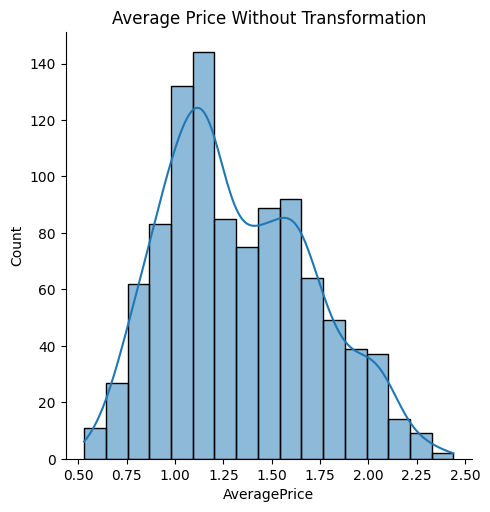

In [16]:
sns.displot(df1['AveragePrice'], kde = True).set(title = "Average Price Without Transformation")

# Almost split, but skewed right. Square root?

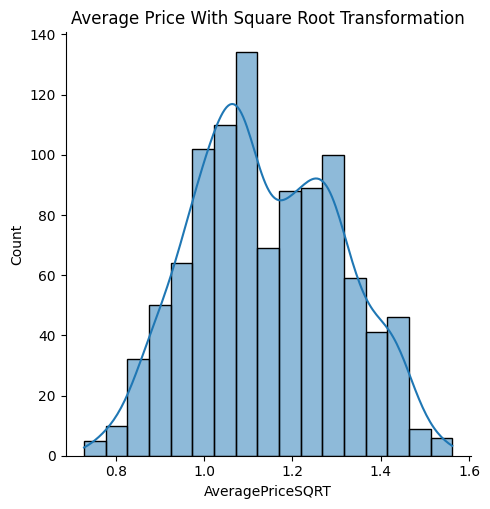

In [17]:
df1['AveragePriceSQRT'] = np.sqrt(df1['AveragePrice'])

sns.displot(df1['AveragePriceSQRT'], kde = True).set(title="Average Price With Square Root Transformation")

# Probably about as normal as we can get given nearly split data. 

## Test Homogeneity of Variance on AveragePrice

In [18]:
scipy.stats.bartlett(df1['AveragePriceSQRT'], df1['region'])

# Pvalue shows it's significant, so it violates the assummption of homogeneity of variance. Log better?

BartlettResult(statistic=1924.1856080555835, pvalue=0.0)

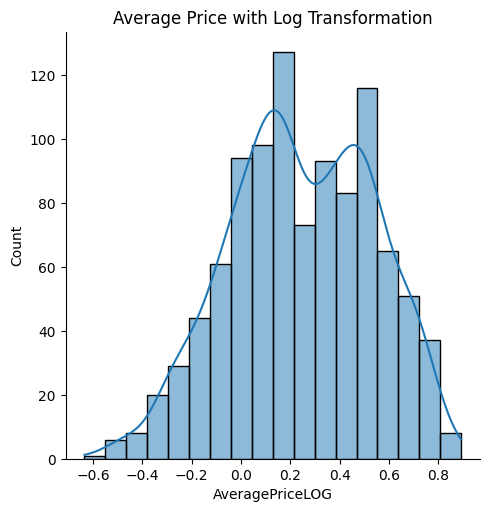

In [19]:
df1['AveragePriceLOG'] = np.log(df1["AveragePrice"])

sns.displot(df1['AveragePriceLOG'], kde = True).set(title="Average Price with Log Transformation")

# Looks skewed left instead... but is the pvalue better on Barlette's?

In [20]:
scipy.stats.bartlett(df1['AveragePriceLOG'], df1['region'])
## Nope, not better. Assumption is not met no matter what we do.  

BartlettResult(statistic=929.626840527, pvalue=3.55972360340007e-204)

## ANOVA (ignoring that it did not meet the homogeneity of variance)

In [21]:
stats.f_oneway(avcdo["AveragePrice"][avcdo["region"]=="Denver"],
              avcdo["AveragePrice"][avcdo["region"]=="LosAngeles"],
              avcdo["AveragePrice"][avcdo["region"]=="Chicago"])

F_onewayResult(statistic=109.15153228173688, pvalue=1.1997829996247808e-43)

### ANOVA Analysis Interpretation
With a pvalue basically 0, the ANOVA shows there is a significant difference in the price between those cities. 
How different? 

# Post Hoc: How different is the average price between Denver, Los Angeles, and Chicago?

In [22]:
postHoc= MultiComparison(df1['AveragePriceSQRT'], df1["region"])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0047 0.9107 -0.0316 0.0222  False
     0      2   0.1453    0.0  0.1184 0.1722   True
     1      2     0.15    0.0  0.1232 0.1769   True
---------------------------------------------------


### Interpret Results on Average Price Up to This Point
One of the regions is significantly different (accept the null hypothesis) than the other two. However, two of the regions are rather similar. 
Specifically, that is Denver and Los Angeles are rather similar. 
Chicago, differs in price greatly in comparison to Denver and Los Angeles. 
By how much? 

### Determine the Means and Draw Conclusions

In [23]:
df2 = df1[['region', 'AveragePrice']]


In [24]:
df2.groupby('region').mean()

,AveragePrice
region,
0,1.218580
1,1.216006
2,1.556775


## Interpretation of the Average Price difference between Denver, Los Angeles and Chicago
"""Chicago""" was region 2, and has a significantly higher average price than Denver and Los Angeles by about 0.34, or a 28% increase in price. For this problem, that means it would be more difficult to live the Avocado Toast Live in Chicago than in Denver or Los Angeles according to the price of Avocados. 



# Does the total volume of avocados sold differ between Denver, LosAngeles, and Chicago?

## Test for Normality on Total Volume

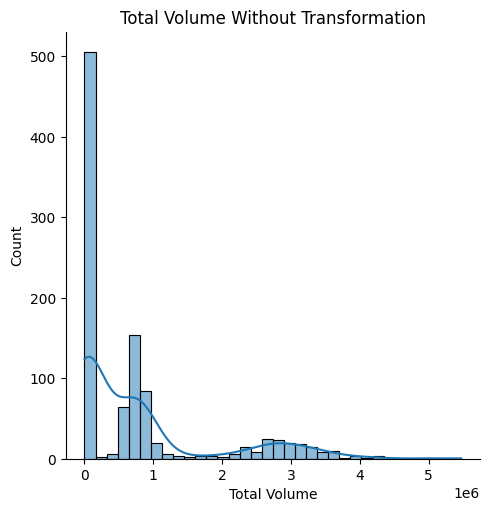

In [25]:
sns.displot(df1['Total Volume'], kde = True).set(title="Total Volume Without Transformation")

## Super skewed right (positively skewed). Log?

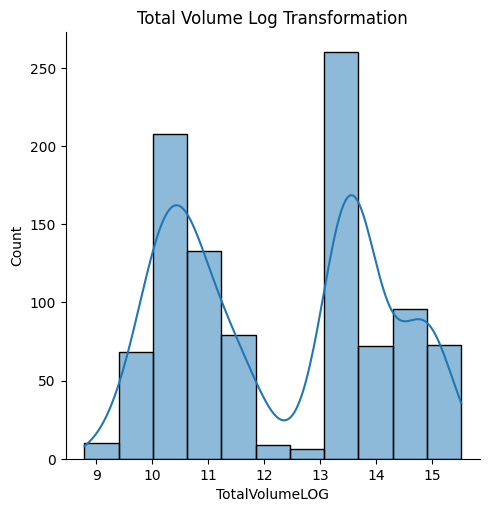

In [26]:
df1['TotalVolumeLOG'] = np.log(df1["Total Volume"])

sns.displot(df1['TotalVolumeLOG'], kde = True).set(title="Total Volume Log Transformation")

# This is so stronglly bimodal, but both bumps are centered??
# *** NOT NORMAL, at all

## Test Total Volume for Homogeneity of Variance (even though it's not normal)

In [27]:
scipy.stats.bartlett(df1["TotalVolumeLOG"], df1["region"])

# Shows this is significant, so it VIOLATES the TEST OF HOMOGENEITY OF VARIANCE, but we proceed. 

BartlettResult(statistic=584.0766516187417, pvalue=4.86778439447666e-129)

## ANOVA for Total Volume (ignoring that it did not meet the homogeneity test)

In [28]:
stats.f_oneway(avcdo["Total Volume"][avcdo["region"]=="Denver"],
              avcdo["Total Volume"][avcdo["region"]=="LosAngeles"],
              avcdo["Total Volume"][avcdo["region"]=="Chicago"])

F_onewayResult(statistic=162.1456398543915, pvalue=8.375961705501693e-62)

### Interpretation of ANOVA on Total Volume
This ANOVA shows there is a significant difference in the volume consumed by each city. 

## Post Hoc: How different is the total volume from these regions?

In [29]:
postHoc= MultiComparison(df1['TotalVolumeLOG'], df1["region"])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   1.1021    0.0  0.7888  1.4153   True
     0      2  -0.0303 0.9719 -0.3436  0.2829  False
     1      2  -1.1324    0.0 -1.4457 -0.8191   True
----------------------------------------------------


### Interpretation of Post Hoc of Total Volume Up to This Point
The volume of avocados in Denver and Los Angeles is different, as well as between Chicago and Los Angeles. 
However, the volume of avocados in Denver and Chicago is similar. 
By how much?

### Determine the Means and Draw Conclusions

In [30]:
df3 = df1[['region', 'Total Volume']]

df3.groupby('region').mean().round()

,Total Volume
region,
0,410954.0
1,1502653.0
2,395569.0


### Interpretation of the Total Volume of Avocados purchased difference between Denver, Los Angeles and Chicago
Los Angeles sold a mean volume of avocados that is nearly 4 times bigger than both Denver and Chicago. 

# Is the type of avocado sold related to the cities? 

In [31]:
pd.crosstab(df1.type, df1.region)

# This is very boring. Nothing interesting to see here. 
# It seems this data is split perfectly between organic and conventional. 
# Running the analysis between type and price or volume would be the same analysis as was done for region. 
# Even running it in R created no different results. 
# Trying my original question about bag size and price. 

region,0,1,2
type,,,
conventional,169,169,169
organic,169,169,169


# Is the size of bag more common in one particular region and does that size effect the price? In other words: how are the size of bag and the region related? Is the average price of avocados in regions where larger bags are more popular lower than the population average? 

#### Data Wrangling for this question

In [32]:
## Trying to combine the bag columns into one so it is one categorical variable.

df1["bagsize"] = np.nan

In [33]:
conditions = [
    (df1['Small Bags']>= df1['Large Bags']) & (df1['Small Bags']>= df1['XLarge Bags']),
    (df1['Large Bags']>= df1['Small Bags']) & (df1['Large Bags']>= df1['XLarge Bags']),
    (df1['XLarge Bags']>= df1['Large Bags']) & (df1['XLarge Bags']>= df1['Small Bags'])
]
choices = ['Small', 'Large', 'XLarge']
df1["bagsize"] = np.select(conditions, choices, default='Neither')

In [34]:
df1.head()

# Yes! That worked. I now have a categorical variable about bag size. 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePriceSQRT,AveragePriceLOG,TotalVolumeLOG,bagsize
416,12/27/2015,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,2,0.964365,-0.072571,13.401717,Small
417,12/20/2015,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,2,0.953939,-0.094311,13.445416,Small
418,12/13/2015,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,2,1.034408,0.067659,13.412943,Small
419,12/6/2015,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,2,1.067708,0.131028,13.406068,Small
420,11/29/2015,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,2,1.053565,0.104360,13.308812,Small


In [35]:
df1['bagsize'].value_counts()
## There were only 229 cases where more large size bags were sold than small, 
   ##  and no cases where there were more XLarge bags than any other bag. 


Small    785
Large    229
Name: bagsize, dtype: int64

# Analysis of Region & Bag Size: Do certain regions sell more bags os a certain size? Independent Chi-Square 

In [36]:
pd.crosstab(df1['region'], df1['bagsize'], margins = True)

#I can see in this table that Denver (region 0) had a lot more large bags than small. 
# I want to see how statistically significant that is. 
# Assumption NOT met to have at least 5 in every cell for the observed values. This will effect the analysis. 

bagsize,Large,Small,All
region,,,
0,223,115,338
1,1,337,338
2,5,333,338
All,229,785,1014


In [37]:
observed = pd.crosstab(df1['region'], df1['bagsize'], margins = False)

In [38]:
scipy.stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=546.1549022334716, pvalue=2.5349526276617674e-119, dof=2, expected_freq=array([[ 76.33333333, 261.66666667],
       [ 76.33333333, 261.66666667],
       [ 76.33333333, 261.66666667]]))

# With a p-value of practically 0, there is a significant relationship between the size of the bag and the region the bags are sold in 
WITH the understanding that the observed values did not meet the minimum requirements, this array of expected values shows that all of the expected values DID meet the minimum requirements. The expected values show what the values would be if there were no relationship between the bag size and the region. 
I can say with confidence that
# There is a significant relationship between the size of the bag sold and the city it was sold in. Specifically, Denver sold almost 45 times more large bags than Chicago and 223 times more bags than Los Angeles. 

This is interesting compared to Los Angles selling the greater volume of avocados compared to Denver by 4 times. It makes me wonder if volume considered the number of bags or the number of avocados. Also interesting to note is the number of bags in each of the cities in this study have a combined total of 338 large and small bags per city. 

In [39]:

# To be run in R: ANCOVA: Running a Covariance with Region and Bag Size on Price
# Change my mind. I want to keep using the 'bagsize' variable already here in Python. Then, I need to install and use another package


# Analysis: Is the price of avocados influenced by the region and bag size? Run an ANCOVA

In [40]:
from pingouin import ancova

In [41]:
# I need to recode my earlier recode for bag size so it's numeric

def recode(series):
    if series == 'Small':
        return 0
    if series == 'Large':
        return 1
    
df1['bagsizeR']= df1['bagsize'].apply(recode)

In [42]:
## Reminding myself of the column names and making sure the re-recode worked. 
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePriceSQRT,AveragePriceLOG,TotalVolumeLOG,bagsize,bagsizeR
416,12/27/2015,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,2,0.964365,-0.072571,13.401717,Small,0
417,12/20/2015,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,2,0.953939,-0.094311,13.445416,Small,0
418,12/13/2015,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,2,1.034408,0.067659,13.412943,Small,0
419,12/6/2015,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,2,1.067708,0.131028,13.406068,Small,0
420,11/29/2015,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,2,1.053565,0.104360,13.308812,Small,0


In [43]:
Looking at it both ways: Region with bagsize as the covariate and bag size with

SyntaxError: invalid syntax (1356126895.py, line 1)

In [44]:
ancova(data=df1, dv="AveragePrice", covar='bagsizeR', between='region')

,Source,SS,DF,F,p-unc,np2
0,region,20.192649,2,86.694494,1.790170e-35,0.146519
1,bagsizeR,2.650164,1,22.756268,2.109572e-06,0.022035
2,Residual,117.623247,1010,NaN,NaN,NaN


In this table we can see the p-value in "p-unc" (uncorrected p-value) for both is way less than 0.05, so we can reject the null hypothesis that they are the same, even accounting for the size of bags sold, there IS a difference in the region and the price. 

Looking at it in a different way...

In [45]:
ancova(data=df1, dv="AveragePrice", covar='region', between='bagsizeR')

,Source,SS,DF,F,p-unc,np2
0,bagsizeR,0.029970,1,0.238800,6.251804e-01,0.000236
1,region,10.931625,1,87.101997,6.335149e-20,0.079320
2,Residual,126.884271,1011,NaN,NaN,NaN


So even looking at it another way, accounting for the region, there is a difference in the price, but not as much in the bag price. That is not a significant factor. Interesting. 